# Comparaison de méthodes de classification supervisée

Les objectifs de ce TP sont :
- de prendre en main et d'utiliser les méthodes de classification supervisée vues en cours, à l'aide de la libririe [scikit-learn](https://scikit-learn.org/stable/).
- d'évaluer la performance des algorithmes et de les paramétrer au mieux.

## Jeu de données 

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

import warnings
warnings.filterwarnings("ignore")

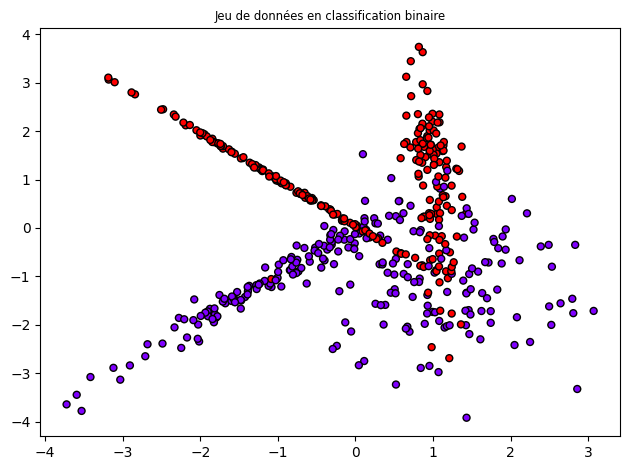

In [2]:
plt.title("Jeu de données en classification binaire", fontsize="small")
X, Y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=2)
plt.scatter(X[:, 0], X[:, 1], marker="o", c=Y, s=25, edgecolor="k",cmap=plt.cm.rainbow)
plt.tight_layout()
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,shuffle=True)

## Utilisation des algorithmes de classification

In [3]:
# On affiche ici le résultat de la classification supervisée des méthodes aves leurs paramètres par défaut

from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC,LinearSVC

def affiche(X,y,met,title):
    met.fit(X_train,y_train)
    y_predict = met.predict(X_test)
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    axs[0].scatter(X[:, 0], X[:, 1], marker="o", c=Y, s=25, cmap=plt.cm.rainbow,edgecolor="k")
    axs[0].set_title('Données',fontsize=10)
    axs[1].scatter(X_train[:, 0], X_train[:, 1],c = y_train, s=30,marker='*', cmap=plt.cm.rainbow,edgecolor="k",alpha=0.25,label='train')
    axs[1].scatter(X_test[:, 0], X_test[:, 1],c = y_predict, s=30, cmap=plt.cm.rainbow,edgecolor="k")
    axs[1].set_title('Classification des données de test : '+title,fontsize=10)
    axs[1].legend(loc='best')
    plt.tight_layout()


def decision(modele, X, y, title,ax,axes=[-1.5, 2.5, -1, 1.5], alpha=0.5):
    x1s = np.linspace(axes[0], axes[1], 200)
    x2s = np.linspace(axes[2], axes[3], 200)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = modele.predict(X_new).reshape(x1.shape)
    map = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    ax.contourf(x1, x2, y_pred, alpha=0.7, cmap=map)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.rainbow,edgecolors='k')
    ax.set_title(title)

In [4]:
classifieurs = {'Bayes':[GaussianNB(),0,0],
                'LDA':[LinearDiscriminantAnalysis(solver='eigen'),0,1],
                'QDA':[QuadraticDiscriminantAnalysis(),1,0],
                'knn':[KNeighborsClassifier(),1,1], 
                'arbre':[DecisionTreeClassifier(),2,0],
                'svmlin':[LinearSVC(dual='auto'),2,1],
                'svmrbf':[SVC(kernel='rbf'),3,0],
                'svmpoly':[SVC(kernel='poly'),3,1]    
               } 

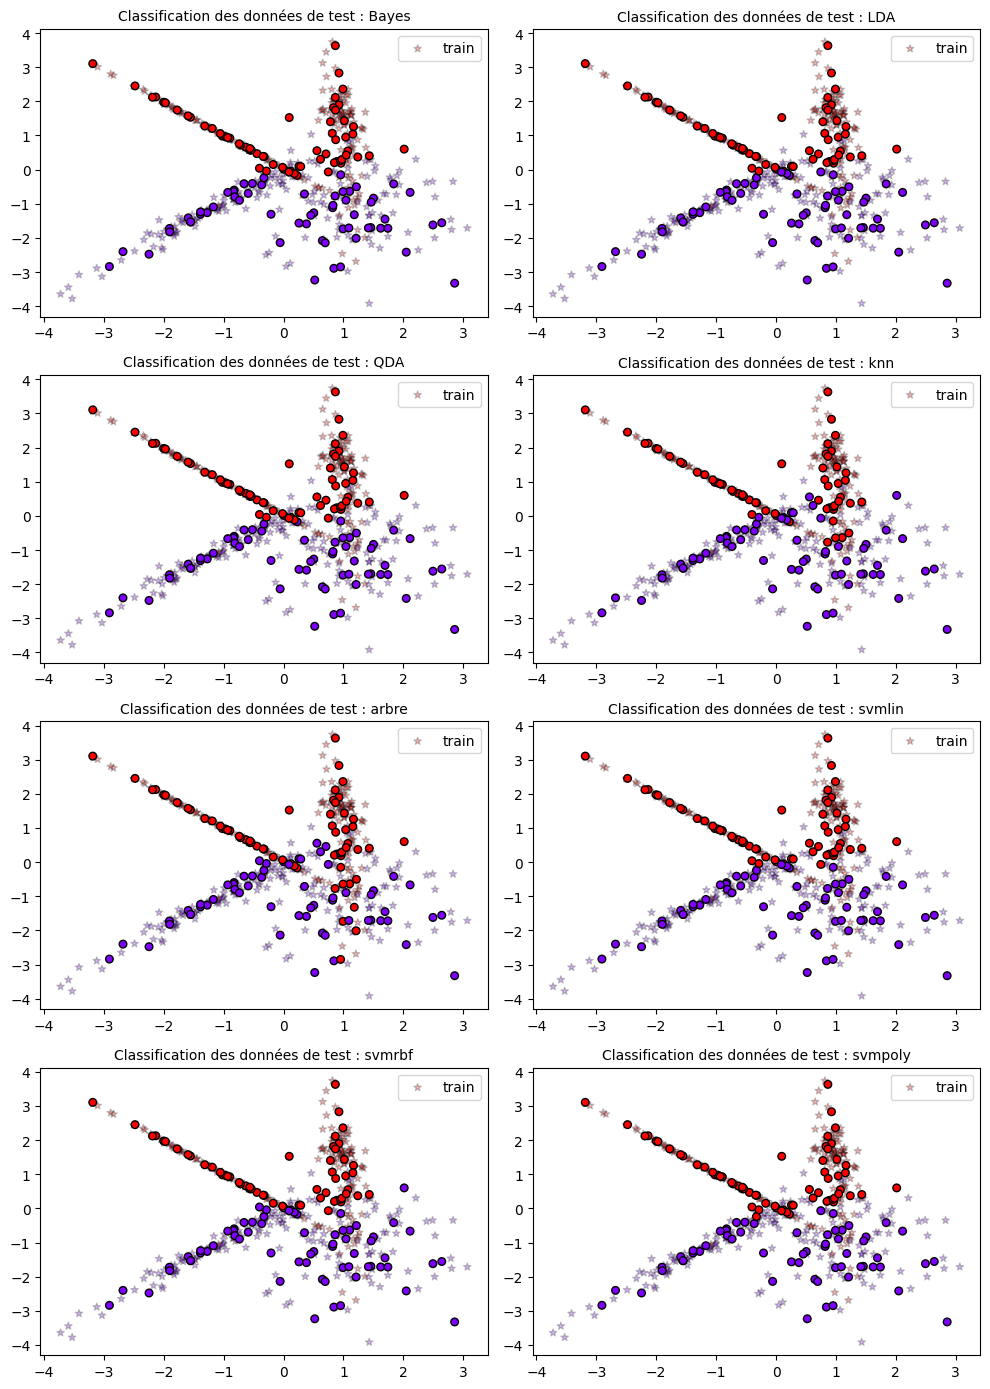

In [6]:
fig, axs = plt.subplots(4, 2,figsize=(10,14))
for name,met in classifieurs.items():
    classifieurs[name][0].fit(X_train,y_train)
    classifieurs[name][0].fit(X_train,y_train)
    ypredict = classifieurs[name][0].predict(X_test)
    pos = axs[classifieurs[name][1],classifieurs[name][2]]

    pos.scatter(X_train[:, 0], X_train[:, 1],c = y_train, s=30,marker='*', cmap=plt.cm.rainbow,edgecolor="k",alpha=0.25,label='train')
    pos.scatter(X_test[:, 0], X_test[:, 1],c = ypredict, s=30, cmap=plt.cm.rainbow,edgecolor="k")
    pos.set_title('Classification des données de test : '+name,fontsize=10)
    pos.legend(loc='best')
 
plt.tight_layout()

## Optimisation des hyperparamètres

In [7]:
from sklearn.model_selection import GridSearchCV

param = {
        'Bayes':[{'var_smoothing':[1e-9,1e-5,0.1]}],
        'LDA':[{'shrinkage':[0,0.5,1]}],
        'QDA':[{'tol':[1e-4,1e-2,1e-1]}],
        'knn':[{'weights': ["uniform", "distance"], 'n_neighbors': [3, 5, 7]}], 
         'arbre':[{'criterion': ['entropy', 'gini'], 'max_depth':np.arange(1, 10),'min_samples_leaf': np.arange(1, 10)}],
        'svmlin':{'C':np.arange(0.01,100,10)},
         'svmrbf':{"C": [1e-1, 1e1, 1e2,1e4],"gamma": [0.01,  0.1,0.5, 1,10]},
         'svmpoly':{"degree": np.arange(1,10),"coef0": np.arange(-5,5)}
        }
predict = {'Bayes':[],
            'LDA':[],
            'QDA':[],
           'knn':[], 
            'arbre':[],
            'svmlin':[],
            'svmrbf':[],
            'svmpoly':[],        
               } 

bestalgo = {'Bayes':[],
            'LDA':[],
            'QDA':[],
           'knn':[], 
            'arbre':[],
            'svmlin':[],
            'svmrbf':[],
            'svmpoly':[],        
               } 

for name,met in classifieurs.items():
    gs = GridSearchCV(met[0], param[name], cv=5, verbose=1, n_jobs=-1)
    gs.fit(X_train, y_train)
    print("Meilleurs paramètres pour "+ name ,gs.best_params_)
    
    bestalgo[name] = gs.best_estimator_
    bestalgo[name].fit(X_train,y_train)
    predict[name] = bestalgo[name].predict(X_test)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Meilleurs paramètres pour Bayes {'var_smoothing': 1e-09}
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Meilleurs paramètres pour LDA {'shrinkage': 0.5}
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Meilleurs paramètres pour QDA {'tol': 0.0001}
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Meilleurs paramètres pour knn {'n_neighbors': 7, 'weights': 'distance'}
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Meilleurs paramètres pour arbre {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 9}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Meilleurs paramètres pour svmlin {'C': 0.01}
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Meilleurs paramètres pour svmrbf {'C': 10.0, 'gamma': 1}
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Meilleurs paramètres pour svmpoly {'coef0': 3, 'degree': 9}


## Analyse de performance

In [8]:
from sklearn.metrics import classification_report

In [9]:
for key,values in predict.items():
    print("*** Résultats pour ", key,' ***')
    print(classification_report(y_test, values))

*** Résultats pour  Bayes  ***
              precision    recall  f1-score   support

           0       0.90      0.80      0.85        66
           1       0.80      0.90      0.85        59

    accuracy                           0.85       125
   macro avg       0.85      0.85      0.85       125
weighted avg       0.85      0.85      0.85       125

*** Résultats pour  LDA  ***
              precision    recall  f1-score   support

           0       0.85      0.80      0.83        66
           1       0.79      0.85      0.82        59

    accuracy                           0.82       125
   macro avg       0.82      0.83      0.82       125
weighted avg       0.83      0.82      0.82       125

*** Résultats pour  QDA  ***
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        66
           1       0.80      0.88      0.84        59

    accuracy                           0.84       125
   macro avg       0.84      0.84      

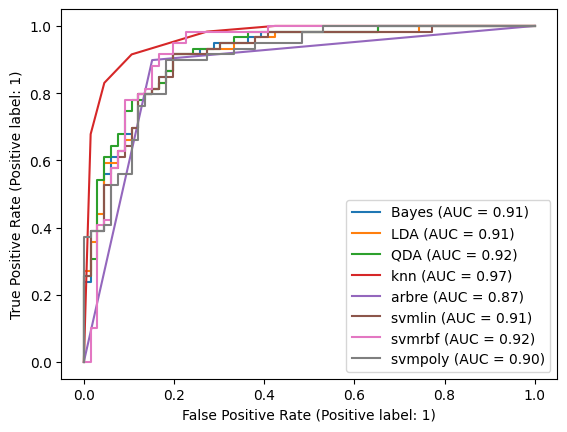

In [12]:
from sklearn.metrics import RocCurveDisplay, roc_curve

fig,ax = plt.subplots()
for key,values in predict.items():
    RocCurveDisplay.from_estimator(classifieurs[key][0], X_test, y_test, ax=ax, name=key)

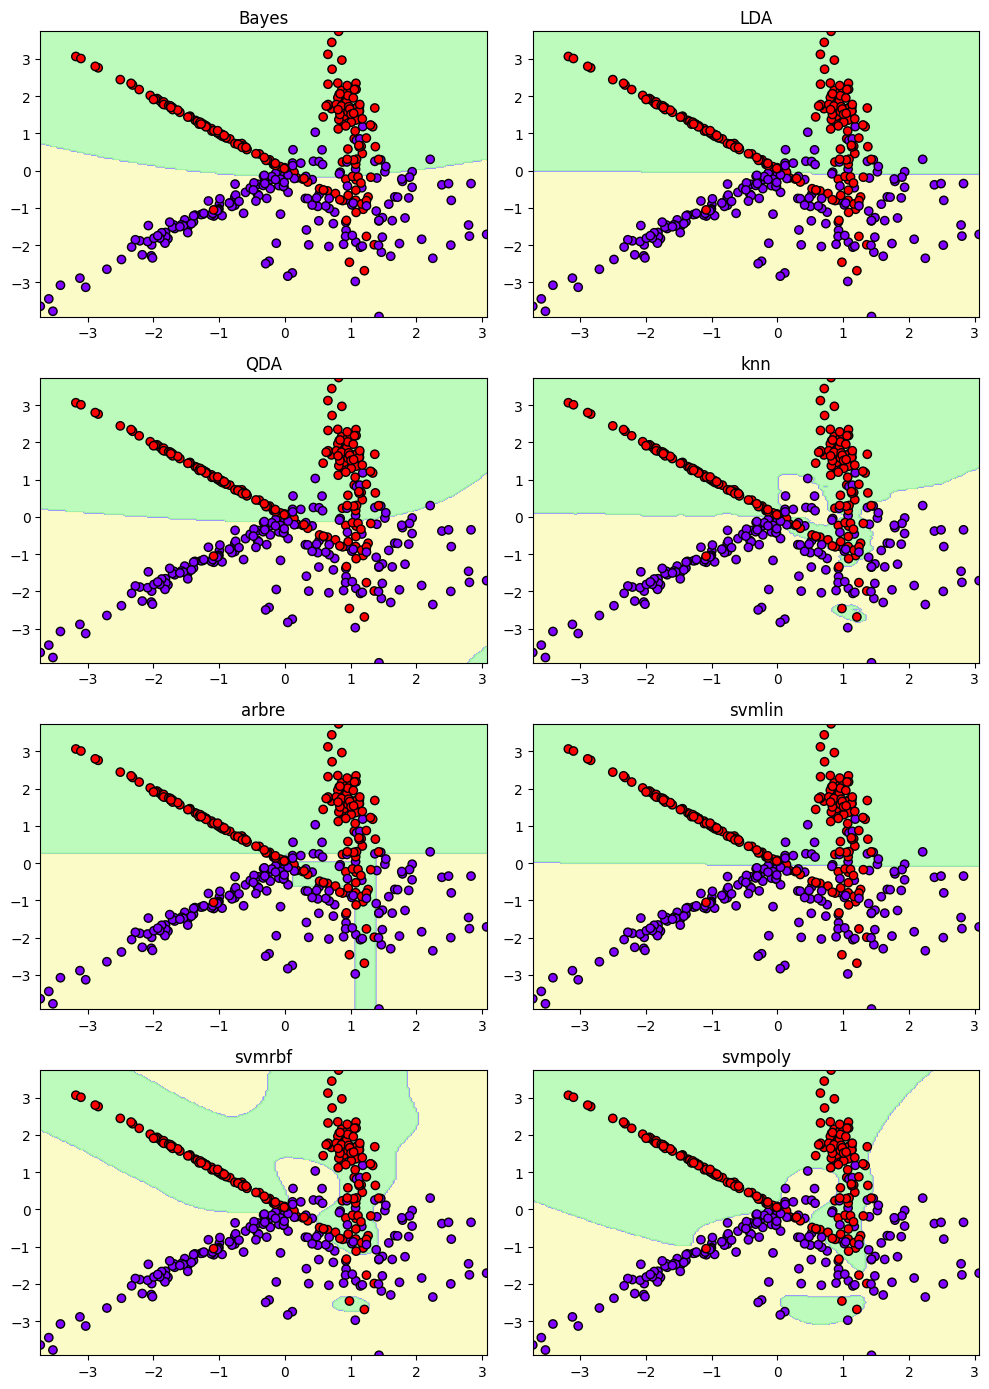

In [13]:
fig, axs = plt.subplots(4, 2,figsize=(10,14))
for name,met in classifieurs.items():
    bestalgo[name].fit(X_train,y_train)
    bestalgo[name].fit(X_train,y_train)
    predict[name] = bestalgo[name].predict(X_test)
    pos = axs[classifieurs[name][1],classifieurs[name][2]]
    decision(bestalgo[name], X_train, y_train,title=name, ax=pos,axes=[np.min(X[:,0]), np.max(X[:,0]), np.min(X[:,1]), np.max(X[:,1])])
plt.tight_layout()